# DDPLKO Moduł 3 - praca domowa - pierwszy własny trening CNN

In [1]:
import urllib
import numpy as np
import matplotlib.pyplot as plt
import os

# Wybierz 10 klas

Poniżej przygotuj listę 10 klas z:
https://quickdraw.withgoogle.com/data

> nazwy takie jak nazwy obiektów (wyświetlane po najechaniu lub kliknięciu)

In [2]:
class_names=['spider', 'penguin', 'shark', 'sheep', 'rhinoceros', 'hedgehog', 'horse', 'fish', 'flamingo', 'frog']

## Test

In [3]:
assert len(class_names)==10, 'Nazw powinno być dokładnie 10'
for i in range(len(class_names)):
    assert type(class_names[i])==str, 'Każda z nazw powinna być typu str'
    assert '/' not in class_names[i], 'Same nazwy klas, ze spacjami, bez ukośników'

# Wczytanie danych
Pobieranie plików z obrazami w formaci npy (numpy)

In [4]:
for name in class_names:
    url = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/%s.npy'%name
    file_name = url.split('/')[-1].split('?')[0]

    url = url.replace(' ','%20')
    
    if not os.path.isfile(file_name):
        print(url, '==>', file_name)
        urllib.request.urlretrieve(url, file_name)

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/spider.npy ==> spider.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/penguin.npy ==> penguin.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/shark.npy ==> shark.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sheep.npy ==> sheep.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/rhinoceros.npy ==> rhinoceros.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/hedgehog.npy ==> hedgehog.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/horse.npy ==> horse.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/fish.npy ==> fish.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/flamingo.npy ==> flamingo.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/frog.npy ==> frog.npy


## Wczytywanie z plików .npy
Dane znajdziesz w tablicy data

In [5]:
data = []
for name in class_names:
    file_name = name+'.npy'
    data.append(np.load(file_name, fix_imports=True, allow_pickle=True))
    print('%-15s'%name,type(data[-1]))

spider          <class 'numpy.ndarray'>
penguin         <class 'numpy.ndarray'>
shark           <class 'numpy.ndarray'>
sheep           <class 'numpy.ndarray'>
rhinoceros      <class 'numpy.ndarray'>
hedgehog        <class 'numpy.ndarray'>
horse           <class 'numpy.ndarray'>
fish            <class 'numpy.ndarray'>
flamingo        <class 'numpy.ndarray'>
frog            <class 'numpy.ndarray'>


# Liczebności i wymiary zdjęć
Wypisz nazwę i shape dla każdej klasy

In [6]:
for class_name, class_object in zip(class_names, data):
  print('%-15s'%class_name, class_object.shape)

spider          (209447, 784)
penguin         (253791, 784)
shark           (126050, 784)
sheep           (126121, 784)
rhinoceros      (188484, 784)
hedgehog        (120527, 784)
horse           (178286, 784)
fish            (134150, 784)
flamingo        (124569, 784)
frog            (159047, 784)


Poniżej zwizualizuj liczbę zdjęć per klasę:

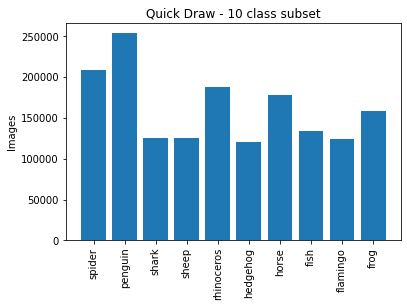

In [7]:
ax = plt.subplot(111)
plt.bar(class_names, height=[d.shape[0] for d in data], tick_label=class_names)
ax.set_xticklabels(class_names, rotation=90)
plt.ylabel("Images");
plt.title("Quick Draw - 10 class subset");

# Wizualizacja danych
Dane są w macierzach dwuwyamirowych,
aby je poprawnie wyświetlić jako obraz,
należy je przekonwertować do 3 wymiarów:

- numer zdjęcia
- wysokość
- szerokość

Tu pomoże `reshape` z numpy.

## Konwersja do (-1, 28, 28)

In [8]:
data = [np.reshape(name, (-1, 28, 28)) for name in data]

Wyświetl po jednym przykładzie z każdej klasy.

Możesz skorzystać z `plt.subplot`

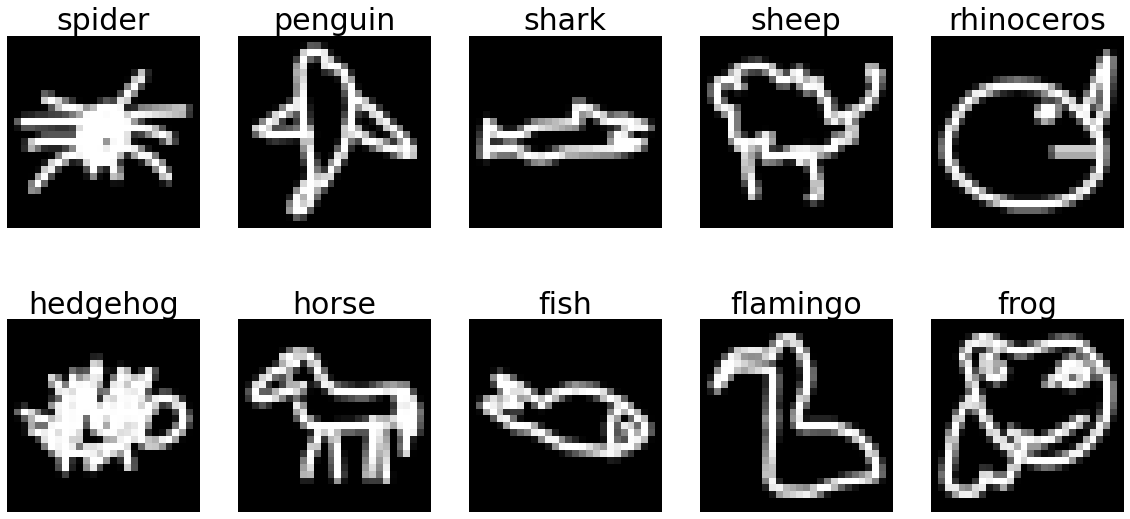

In [9]:
plt.figure(figsize=(20,20))
for i, example in enumerate(data):
    plt.subplot(4,5,1+i)
    plt.title(class_names[i], fontsize=30)
    plt.imshow(example[0], cmap='gray', vmin=0, vmax=255)
    plt.axis('off')

## Obraz średni
Jak podobne do siebie są obrazy z poszczególnych klas?

Oblicz i wyświetl średni obraz dla wszystkich klas.

Możesz skorzystać z `np.mean`

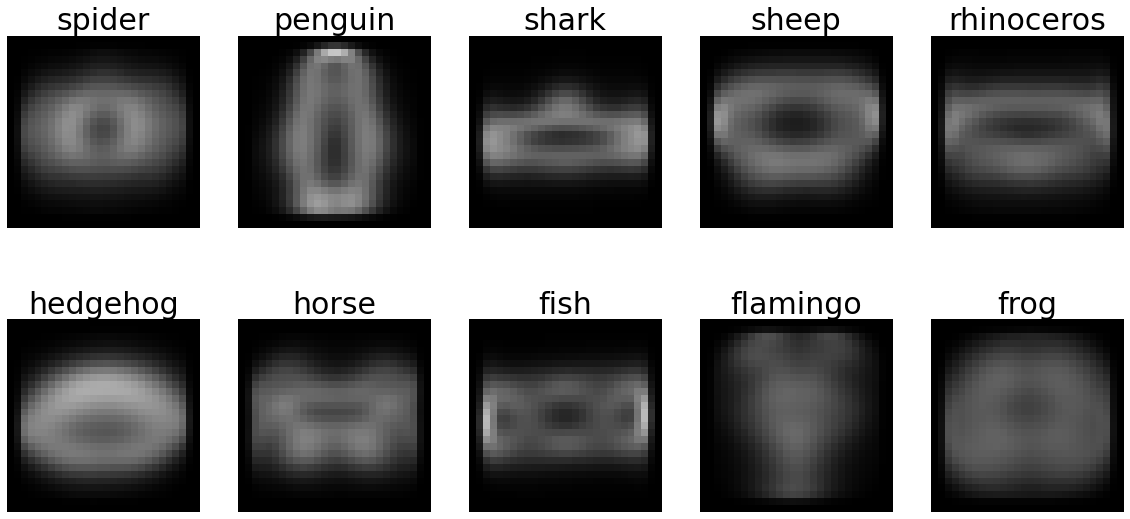

In [10]:
plt.figure(figsize=(20,20))
for i, example in enumerate(data):
    plt.subplot(4,5,1+i)
    plt.title(class_names[i], fontsize=30)
    
    plt.imshow(np.mean(example, axis=0), cmap='gray', vmin=0, vmax=255)
    plt.axis('off')

# Trening w TensorFlow

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.5)
import tensorflow as tf

for gpu in tf.config.list_physical_devices('GPU'):
    tf.config.experimental.set_memory_growth(gpu, True)

ModuleNotFoundError: No module named 'seaborn'

In [15]:
data

[array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

# Przygotowanie danych
Przygotowanie listy etykiet oraz macierzy zdjęć
Przygotuj:
- [ ] X - jako macierz numpy w której będą wszystkie zdjęcia
- [ ] y - jako macierz numpy w której będą wszystkie etykiety (jako numer klasy)
- [ ] wykonaj reshape dla X do (-1,28,28,1)

Co może Ci się przydać:
- łączenie macierzy - np.concatenate
- mnożenie listy przez N zwraca listę z N-krotnie więcej elementami [0]*3 ==>> [0,0,0]
- konwersja listy do macierzy numpy - np.array([0,1,2,3])

Korzystając z pythonowych zapisów możesz to zrobić w jednej lini per zmienną, nie zapisuj w obu w jednej, bo to już nie będzie czytelne (tak, da się)

In [13]:
X = np.concatenate(np.array(data, dtype=object), axis=0)
X = np.reshape(X, (-1, 28, 28, 1))
X = X = X.astype('float32')

y = np.concatenate([np.array([i] * len(_)) for i, _ in enumerate(data)], axis=0)
y = y = y.astype('int64')

## Test

In [14]:
assert type(X)==np.ndarray,                 "X powinno być macierzą numpy"
assert type(y)==np.ndarray,                 "y powinno być macierzą numpy"
assert len(X)==sum([len(_) for _ in data]), "X powinno mieć tyle samo przykładów ile jest w data"
assert len(y)==sum([len(_) for _ in data]), "Y powinno mieć tyle samo etykiet ile jest przykładów w data"
assert len(X.shape)==4,                     "X - Wymagane są 4 wymiary - index, wysokość, szerokość, głębokość"
assert len(y.shape)==1,                     "y - Wymagany jest 1 wymiar"
assert X.shape[1:]==(28,28,1),              "Zdjęcia powinny być 28x28x1"

## Normalizacja

Przygotuj dane (X) w taki sposób by wartości były bliskie zera.
W celu zachowania prostoty - podziel wartości przez 255, a nie przez najwyższą wartość.
Nie przesuwaj średniej do zera, i nie normalizuj odchylenia.

In [15]:
X = X/255

### Test

In [16]:
assert np.max(X)<=1, "Największa wartość nie może być większa niż 1"
assert np.min(X)>=0, "Pracujmy w zakresie od 0..1"

## Podział zbioru danych

Podziel zbiór zachowując ten sam stosunek liczby klas w train i val.
Do podziału użyj `train_test_split` z `sklearn`.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

### Wizualizacja podziału

Przygotuj wykres, który pokaże jak dane train i val sumują się dla poszczególnych klas (trening+val powinny być jako jeden słupek, sumarycznie wysokości słupka przed podziałem). Podpowiedź - stacked bar plot.
Przygotuj drugi wykres, który pokaże czy zbiór danych jest podzielony z zachowaniem stosunku liczebności poszczególnych klas (zachowanie procentowych udziałów klas w zbiorze).

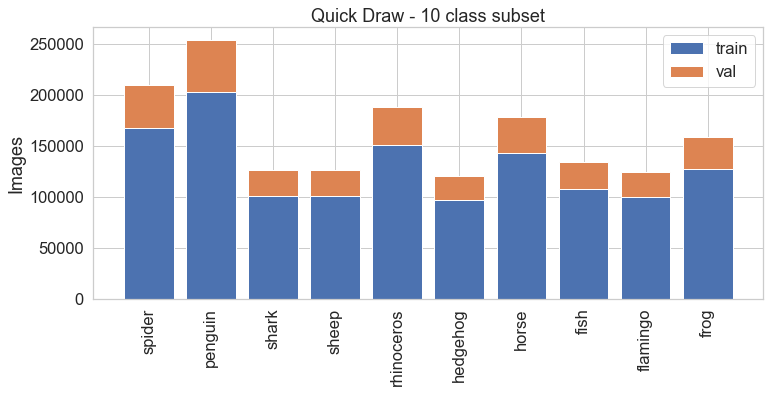

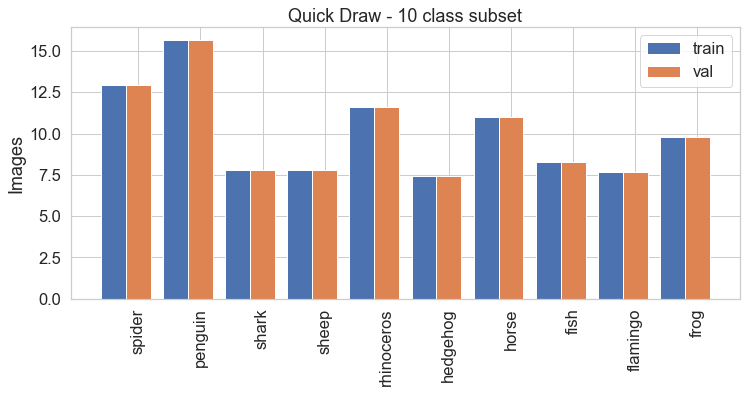

In [18]:
plt.figure(figsize=(12, 5))
ax = plt.subplot(111)
plt.title("Quick Draw - 10 class subset")
plt.ylabel("Images")
a = [np.count_nonzero(y_val == d[name]) for name in class_names]
b = [np.count_nonzero(y_train == d[name]) for name in class_names]
ax.bar(class_names, b, label="train", tick_label=class_names)
ax.bar(class_names, a, bottom=b, label="val", tick_label=class_names)
ax.set_xticklabels(class_names, rotation=90)
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
ax = plt.subplot(111)
plt.title("Quick Draw - 10 class subset")
plt.ylabel("Images")
a = np.array(a) / len(y_val) * 100
b = np.array(b) / len(y_train) * 100
x = np.arange(len(class_names))
ax.bar(x - 0.2, b, 0.4, label="train", tick_label=class_names)
ax.bar(x + 0.2, a, 0.4, label="val", tick_label=class_names)
ax.set_xticklabels(class_names, rotation=90)
plt.legend()
plt.show()

## Test podziału danych

In [19]:
assert all((np.unique(y_train, return_counts=True)[1]/len(y_train)).round(2) == (np.unique(y_val, return_counts=True)[1]/len(y_val)).round(2)), "Nierówny podział danych, zadbaj by rozkład w train i val były takie same"

# Przygotuj model

- Wykorzystaj warstwy konwolucyjne (minimum 1), pamiętaj o funkcjach aktywacji
- Wykorzystaj Flatten
- Model powinien mieć:
  - wejście 28,28,1
  - 10 wyjść
  - Adama jako optymalizator
  - sparse CE loss
  - warto dodać accuracy jako metrykę
  
Pooling wprowadzimy w module 4, a i bez niego uzyskasz >80% accuracy.

In [19]:
def getModel():
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(8,(3,3), activation='relu',input_shape=(28, 28,1)),
                tf.keras.layers.Conv2D(16,(3,3), activation='relu'),
                tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(10, activation='softmax')])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
model = getModel()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                154890    
Total params: 160,778
Trainable params: 160,778
Non-trainable params: 0
_________________________________________________________________


## Test

In [20]:
assert type(model)==tf.keras.models.Sequential, "Model powinien być tf.keras.models.Sequential"
assert model.compiled_loss is not None, "Skompiluj model"
assert model.loss == 'sparse_categorical_crossentropy', "Użyj jako loss 'sparse_categorical_crossentropy'"
assert model.count_params()>7850, "Zbuduj większy model"
assert all(['linear' not in str(l.activation) for l in model.layers if 'activation' in dir(l)]), 'Gdy nie podasz aktywacji, aktywacją jest funkcja liniowa; użyj ReLU, bądź softmax, odpowiednio'
assert any(['Conv2D' in str(l) for l in model.layers if 'activation' in dir(l)]), 'Użyj konwolucji 2D'
assert list(model.input.shape)==[None,28,28,1], "Wejście do modelu powinno mieć rozmiar None,28,28,1"
assert list(model.output.shape)==[None,10],     "Wyjście z modelu powinno mieć rozmiar None,10"
assert "Adam" in str(model.optimizer), "Użyj adama jako optymalizatora"

# Trening

Wykonaj trening:
- 10 epok
- batch size - wybierz pomiędzy 1 a ile Ci się zmieści na GPU (np. 256)
- z walidacją
- zapisz wynik funkcji model.fit do zmiennej `history`

In [21]:
epochs = 10
batch_size = 256

history = model.fit(
    X_train[:500000],
    y_train[:500000],
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val[:100000], y_val[:100000]),
)


Epoch 1/10
1954/1954 [==============================] - 28s 11ms/step - loss: 0.5847 - accuracy: 0.8230 - val_loss: 0.4525 - val_accuracy: 0.8664
Epoch 2/10
1954/1954 [==============================] - 21s 11ms/step - loss: 0.4191 - accuracy: 0.8754 - val_loss: 0.4124 - val_accuracy: 0.8781
Epoch 3/10
1954/1954 [==============================] - 20s 10ms/step - loss: 0.3771 - accuracy: 0.8876 - val_loss: 0.3897 - val_accuracy: 0.8852
Epoch 4/10
1954/1954 [==============================] - 20s 10ms/step - loss: 0.3511 - accuracy: 0.8952 - val_loss: 0.3861 - val_accuracy: 0.8861
Epoch 5/10
1954/1954 [==============================] - 20s 10ms/step - loss: 0.3334 - accuracy: 0.8996 - val_loss: 0.3833 - val_accuracy: 0.8860
Epoch 6/10
1954/1954 [==============================] - 21s 11ms/step - loss: 0.3186 - accuracy: 0.9035 - val_loss: 0.3864 - val_accuracy: 0.8870
Epoch 7/10
1954/1954 [==============================] - 20s 10ms/step - loss: 0.3074 - accuracy: 0.9066 - val_loss: 0.3813 -

## Wizualizacja historii treningu

Przygotuj wykres na którym pokażesz jak podczas treningu zmieniało się training i validation accuracy.

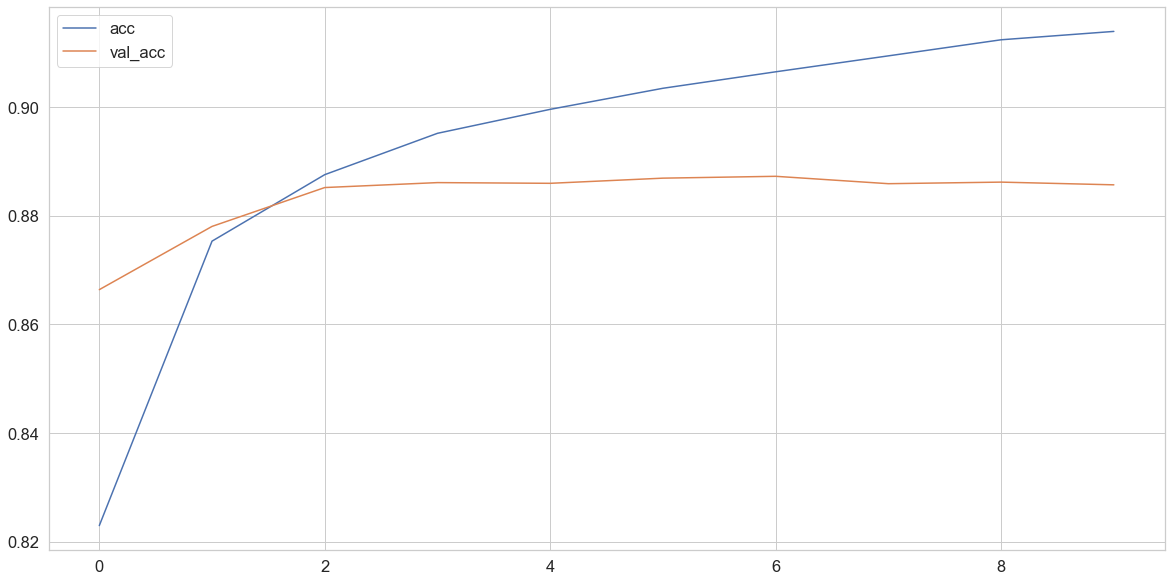

In [22]:
plt.figure(figsize=(20, 10))
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

### Test

In [23]:
assert list(history.history.keys())==['loss', 'accuracy', 'val_loss', 'val_accuracy'], "Trening powinien być z walidacją oraz metryką accuracy"
assert len(history.history['loss'])==10, "Wystarczy 10 epok"

In [24]:
# free GPU mem
del model

# Pytorch Lightning

In [20]:
import torch
from torch.nn import functional as F
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

from torchvision import datasets, transforms

from pytorch_lightning.core.lightning import LightningModule
from pytorch_lightning import Trainer
from torchmetrics.functional.classification.accuracy import accuracy

## klasa QuickDrawCNN_PL

- [ ] Zamień dane na Tensory
- [ ] Przekonwertuj dane do formatu NCHW z NHWC
- [ ] Zapewnij odpowiedni typ danych dla etykiet
- [ ] Przygotuj zbiór danych - skorzystaj z `TensorDataset`
- [ ] Zaprojektuj architekturę sieci z minimum 1 warstwą konwolucyjną

In [21]:
class QuickDrawCNN_PL(LightningModule):
    def __init__(self, X_train,y_train,X_val,y_val):
        super().__init__()
        self.X_train=torch.from_numpy(X_train).permute(0,3,1,2)
        self.X_val=torch.from_numpy(X_val).permute(0,3,1,2)
        self.y_train=torch.from_numpy(y_train)
        self.y_val=torch.from_numpy(y_val)
        self.train_dataset = TensorDataset(self.X_train, self.y_train)
        self.val_dataset = TensorDataset(self.X_val, self.y_val)
        
        ####################
        ### Don't chagne ###
        assert type(self.X_train)==torch.Tensor
        assert self.X_train.shape==torch.Size([len(X_train), 1, 28, 28])
        assert self.X_train.dtype==torch.float32, "Typ X_train niepoprawny"
        
        assert type(self.y_train)==torch.Tensor
        assert self.y_train.shape==torch.Size([len(X_train)])
        assert self.y_train.dtype==torch.int64, "Typ y_train niepoprawny"
        
        assert type(self.X_val)==torch.Tensor
        assert self.X_val.shape==torch.Size([len(X_val), 1, 28, 28])
        assert self.X_val.dtype==torch.float32, "Typ X_val niepoprawny"

        assert type(self.y_val)==torch.Tensor
        assert self.y_val.shape==torch.Size([len(y_val)])
        assert self.y_val.dtype==torch.int64, "Typ y_val niepoprawny"
        ### Don't chagne ###
        ####################

        self.batch_size = 64
        self.num_classes = 10
        self.dims = (1, 28, 28)
        channels, width, height = self.dims

        self.model = nn.Sequential(
            nn.Conv2d(channels, 8, 3),
            nn.ReLU(),
            nn.Conv2d(8, 16, 3),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(15488, self.num_classes),
        )

        ####################
        ### Don't change ###
        assert any(['Conv2d' in str(_) for _ in self.model]), "Zastosuj przynajmniej jedną warstwę Conv2d"
        assert len([_ for _ in self.model if 'Conv2d' in str(_)])==len([_ for _ in self.model if 'ReLU' in str(_)]), "Po każdej warstwie Conv2d zastosuj funkcję aktywacji ReLU"
        ### Don't change ###
        ####################
    def forward(self, x):
        x = self.model(x)
        return F.log_softmax(x, dim=1)

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-3)

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)
        preds = torch.argmax(logits, dim=1)
        acc = accuracy(preds, y)

        # Calling self.log will surface up scalars for you in TensorBoard
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)
        return loss

    def test_step(self, batch, batch_idx):
        # Here we just reuse the validation_step for testing
        return self.validation_step(batch, batch_idx)

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, num_workers=8)

    def val_dataloader(self):
        return DataLoader(self.val_dataset, batch_size=self.batch_size, num_workers=8)

### Trening

- [ ] Uruchom trening na 10 epok
- [ ] Batch size ustaw na wartość np. od 32 do 256 (możesz mniej, możesz więcej)
- [ ] Utwórz instancję klasy QuickDrawCNN_PL
- [ ] Przygotuj `Trainer`
- [ ] Uruchom trening

In [ ]:
model = QuickDrawCNN_PL(X_train, y_train, X_val, y_val)
trainer = Trainer(
    gpus=1,
    max_epochs=10,
)
trainer.fit(model)

### Uruchom TensorBoard do wizualizacji wyników

In [24]:
%load_ext tensorboard
%tensorboard --logdir lightning_logs/


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 3064), started 2 days, 21:52:55 ago. (Use '!kill 3064' to kill it.)

# Wyślij rozwiązanie
Możesz skorzystać z jednego z poniższych sposobów:
**mailem na specjalny adres** ze strony pracy domowej w panelu programu prześlij jedno z poniższych:
- notebooka (jeżeli plik ma mniej niż np. 10MB)
- notebooka w zipie
- link do Colaba (udostępniony)
- link do pliku przez GDrive/Dropboxa/WeTransfer/...
- pdfa (poprzez download as pdf)
- jako plik w repozytorium na np. GitHubie, by budować swoje portfolio (wtedy uważaj na wielkość pliku, najlepiej kilka MB, Max 25MB)

Najlepiej, by w notebooku było widać wyniki uruchomienia komórek, chyba, że przez nie plik będzie mieć 100+MB wtedy najlepiej Colab lub jakieś przemyślenie co poszło nie tak (zbyt dużo dużych zdjęć wyświetlonych w komórkach).

## Co otrzymasz?
Informację zwrotną z ewentualnymi sugestiami, komentarzami.